###                                    TERM PROJECT ON:
#                    Buckling of a Simply Supported Rectangular Plate under Bending and Compression

__Submitted by__: <br>
            Neeraj Narayanan (20ME63R23) <br>
            Vikram Kumar     (20ME63R29) <br>
            Nikhil Anand     (20ME63R39) <br>

 __INTRODUCTION__ <br>
Steel plates are widely used in buildings, bridges, automobile, ships etc. and unlike beams which  have lengths longer than the other two dimensions and so are modeled as linear members, steel plates have widths comparable to their lengths and so are modeled as two-dimensional plane members. These plates undergo instability in the form of buckling and tends to buckle out of their plane under membrane compression. This buckled shape depends on loading and support conditions in both length and width.<br>
In this work we aim to find critical loading for a simply suported rectangular plate under both compression and bending.

__Problem Statement__<br>
A simply supported rectangular plate (on all sides) (Fig.1) is considered with axes as shown. The distributed forces are shown in Fig.1 along the sides x=0 and x=a. The distributed force is acting in the middle plane of the plate , the intensity of the applied forces is given by<br><br>
$$N_x = N_o\left(1-\frac{\alpha y}{b}\right) \tag{a}$$<br>
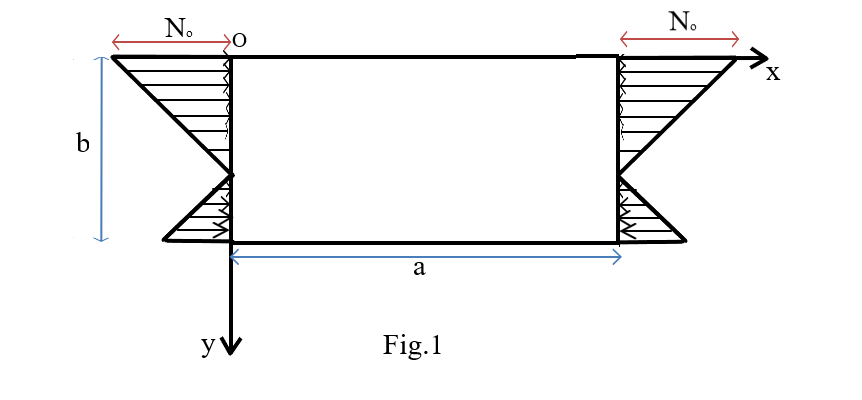<br>
where,<br>
$N_o$ is the intensity of compressive force at the edge y = 0 and $\alpha$ is a numerical factor. By changing the value for $\alpha$ we can obtain particular cases, for example for $\alpha$=0 we obtain UDL compressive force, for $\alpha$=2 we have Pure bending.<br> If α<0 we have a combination of bending and compression and if α>0, there will be a similar combination of bending and tension.<br>
Our aim is to analyse different cases of $\alpha$ and plot the results.

In [1]:
import sympy as sym

The Föppl-von Kármán first equation is<br>
$$D\nabla^4 w = q + N_x\frac{\partial^2{w}}{\partial x^2} + N_y\frac{\partial^2{w}}{\partial y^2} -2N_{xy}\frac{\partial^2{w}}{\partial x\partial y} \tag{1}$$
For our uniaxial comperssion problem we have $N_{xy}=0 , N_y=0$ and q=0<br>
Hence our governing equation is given as <br>
$$D\nabla^4 w = N_x\frac{\partial^2{w}}{\partial x^2} \tag{2}$$

The deflection of the buckled plate simply supported on all sides can be
taken in the form of the double trigonometric series
$$w = \sum\limits_{m=1} ^{\infty}\sum\limits_{n=1} ^{\infty}a_{mn}\sin\frac{m\pi x}{a}\sin\frac{n\pi y}{b}$$<br>
We assume m half-waves along x-axis hence the deflection of plate expression becomes<br>
$$w = \sum\limits_{n=1} ^{\infty}\sin\frac{m\pi x}{a}a_{mn}\sin\frac{n\pi y}{b} \tag{3}$$<br>

Defining deflection of buckled plate $w$

In [2]:
D, Nx,No, x, y = sym.symbols('D,N_x,N_o,x,y')
a,b = sym.symbols('a,b',positive=True)
Amn,m,n = sym.symbols('a_mn,m,n')
w = Amn*sym.sin(m*sym.pi*x/a)*sym.sin(n*sym.pi*y/b)
from IPython.display import Math
display(Math(r'w = \sum\limits_{{n=1}} ^{{\infty}} {}'.format(sym.latex(w))))

<IPython.core.display.Math object>

In [3]:
def laplacian(f):
    return sym.diff(f,x,2)+sym.diff(f,y,2)

def biharmonic(f):
    return laplacian(laplacian(f))

Solving the governing equation equation (2) for this $w$

In [4]:
lhs = biharmonic(w)
display(Math(r'LHS = \sum\limits_{{n=1}} ^{{\infty}}  ({})'.format(sym.latex(lhs.simplify()))))

<IPython.core.display.Math object>

In [5]:
alpha = sym.symbols('alpha')
Nx = No*(1-alpha*y/b)
display(Math(r'N_x = {}'.format(sym.latex(Nx))))

<IPython.core.display.Math object>

In [6]:
rhs = Nx*sym.diff(w,x,2)
display(Math(r'RHS = \sum\limits_{{n=1}} ^{{\infty}}  ({})'.format(sym.latex(rhs.simplify()))))

<IPython.core.display.Math object>

Solving the $LHS=RHS$ equation manually we arrive at the equation<br>
$$\sum\limits_{{n=1}} ^{{\infty}}\left((\frac{m\pi}{a})^2 + (\frac{n\pi}{b})^2\right)^2 a_{mn} \sin\frac{n\pi y}{b} = \sum\limits_{{n=1}} ^{{\infty}}\frac{N_o}{D}(\frac{m\pi}{a})^2(1-\alpha\frac{y}{b})a_{mn}\sin\frac{n\pi y}{b}$$<br>
Multiplying both sides by $\sin\frac{p\pi y}{b}$ and integrating wrt 'y' we get

$$\int_{y=0}^b\sum\limits_{{n=1}} ^{{\infty}}\left((\frac{m\pi}{a})^2 + (\frac{n\pi}{b})^2\right)^2 a_{mn} \sin\frac{n\pi y}{b}\sin\frac{p\pi y}{b} dy = \int_{y=0}^b\sum\limits_{{n=1}} ^{{\infty}}\frac{N_o}{D}(\frac{m\pi}{a})^2(1-\alpha\frac{y}{b})a_{mn}\sin\frac{n\pi y}{b}\sin\frac{p\pi y}{b}dy \tag{4}$$

Using the following equations to simplify above equation<br>
$\int_{y=0}^b\sin\frac{n\pi y}{b}\sin\frac{p\pi y}{b} dy = 0  \forall p \neq n\tag{b}$ <br> 
and <br>
$\int_{y=0}^b\sin\frac{n\pi y}{b}\sin\frac{p\pi y}{b} dy= \frac{b}{2} 	for p = n \tag{c}$ <br>

For all $n \neq p$ LHS of eq(4) becomes $0$<br>
and for $n = p$ LHS will become<br>
$$LHS = \left((\frac{m\pi}{a})^2 + (\frac{p\pi}{b})^2\right)^2 a_{mp}\frac{b}{2}$$

Now, solving the RHS of the eq(4)<br>
$$RHS = \int_{y=0}^b\sum\limits_{{n=1}} ^{{\infty}}\frac{N_o}{D}(\frac{m\pi}{a})^2a_{mn}\sin\frac{n\pi y}{b}\sin\frac{p\pi y}{b}dy - \int_{y=0}^b\sum\limits_{{n=1}} ^{{\infty}}\frac{N_o}{D}
(\frac{m\pi}{a})^2\alpha\frac{y}{b}a_{mn}\sin\frac{n\pi y}{b}\sin\frac{p\pi y}{b}dy $$<br>
Now for simplicity in calculations we solve the two integrations in RHS individually as $RHS =  RHS1 - RHS2$

Solving for $RHS1$<br>
$RHS1 = \int_{y=0}^b\sum\limits_{{n=1}} ^{{\infty}}\frac{N_o}{D}(\frac{m\pi}{a})^2a_{mn}\sin\frac{n\pi y}{b}\sin\frac{p\pi y}{b}dy$<br>
utilising eq(b) and (c) for $\int_{y=0}^b\sin\frac{n\pi y}{b}\sin\frac{p\pi y}{b} dy$ term and simplifying,RHS1 becomes <br>
$$RHS1 = \frac{N_o}{D}a_{mp}\frac{b}{2}(\frac{m\pi}{a})^2$$

Solving for RHS2<br>
$$RHS2 = \int_{y=0}^b\sum\limits_{{n=1}} ^{{\infty}}\frac{N_o}{D}
(\frac{m\pi}{a})^2\alpha\frac{y}{b}a_{mn}\sin\frac{n\pi y}{b}\sin\frac{p\pi y}{b}dy $$<br>
$\implies RHS2 =\sum\limits_{{n=1}} ^{{\infty}}
(\frac{m\pi}{a})^2\frac{N_o}{D}\alpha a_{mn} \frac{1}{2}[\int_{y=0}^b\frac{y}{b}\cos(\frac{(p-n)y\pi}{b})dy -\int_{y=0}^b\frac{y}{b}\cos(\frac{(p+n)y\pi}{b})dy] $ <br><br>
Let $\frac{y}{b}=y'$ $\implies dy = bdy'$ <br>
$$RHS2 =\sum\limits_{{n=1}} ^{{\infty}}\frac{N_o}{D}
(\frac{m\pi}{a})^2\alpha a_{mn} \frac{b}{2}[\int_{y=0}^b y'\cos(\frac{(p-n)y'\pi}{1})dy' -\int_{y=0}^b y'\cos(\frac{(p+n)y'\pi}{1})dy']$$<br>
$$RHS2 =\sum\limits_{{n=1}} ^{{\infty}}\frac{N_o}{D}
(\frac{m\pi}{a})^2\alpha a_{mn} \frac{b}{2}[I_1 -I_2] \tag{5}$$


Solving for Integral $I_1$<br>
$$I_1 = [y'\frac{\sin(p-n)\pi y'}{p-n)\pi} - (-(\frac{\cos(p-n)\pi y'}{(p-n)\pi)^2})) ]_0^b $$<br> <br>
For p$\neq$n<br>
$$I_1 = 0 - \frac{[1 - (-1)^{p-n}]}{((p-n)\pi)^2}$$<br>
For p = n <br> $I_1$ becomes of form $\frac{0}{0}$<br>
By applying L'Hospitals Rule and taking appropriate limits (n$\rightarrow$p)<br>
We get $$I_1 = \frac{1}{2}$$

Now evaluating 2nd integral $I_2$<br>
For p = n case $p+n \rightarrow$ even number 
Hence,<br>
$$I_2 = y'[\frac{\sin(p+n)\pi y}{(p+n)\pi}]_{0}^{b} - [\frac{-\cos(p+n)\pi y'}{((p+n)\pi)^2}]_{0}^{b}$$<br>
$$I_2 = 0 - \frac{(1-1)}{((p+n)\pi)^2}$$<br>
$$\implies I_2 = 0$$<br>
Now, for p$\neq$n case<br>
$$I_2 = y'[\frac{\sin(p+n)\pi y}{(p+n)\pi}]_{0}^{b} - [\frac{-\cos(p+n)\pi y'}{((p+n)\pi)^2}]_{0}^{b}$$<br>
$$I_2 = 0 - \frac{(1-(-1)^{p+n})}{((p+n)\pi)^2}$$

Now we substitute $I_1 and I_2$ in equation(5)<br>
__For the case of__ $p\neq n$<br>
$$RHS2 =\sum\limits_{{n=1}} ^{{\infty}}\frac{N_o}{D}
(\frac{m\pi}{a})^2\alpha a_{mn} \frac{b}{2}[- \frac{[1 - (-1)^{p-n}]}{((p-n)\pi)^2} -\frac{(1-(-1)^{p+n})}{((p+n)\pi)^2}]$$
<br>
We observe that the above terms exists only when $(p-n)$ and $(p+n)$ are odd <br>Since,<br>
when (p-n) and (p+n) are odd
$$1-(-1)^{p-n} = 2$$  and $$1-(-1)^{p+n}=2$$
else both becomes 0.<br>
Hence the RHS2 euation becomes<br>
$$RHS2 =\sum\limits_{{n=1}} ^{{\infty}}\frac{N_o}{D}
(\frac{m\pi}{a})^2\alpha a_{mn} \frac{b}{2}[\frac{-2(p+n)^2 + 2(p-n)^2}{\pi^2 ((p+n)(p-n))^2}]$$
<br>
$$\implies RHS2 =\sum\limits_{{n=1,n\neq p}} ^{{\infty}}
(\frac{m\pi}{a})^2\alpha a_{mn} \frac{8b}{2\pi^2}[\frac{-pn}{(p^2-n^2)^2}]$$<br><br>
__For the case of__ $p = n$<br>
$$RHS2 =\frac{N_o}{D}
(\frac{m\pi}{a})^2\alpha a_{mp} \frac{b}{4}$$

We combine both RHS2 terms for $n=p$ and $n\neq p$ to get the overall expression for all n<br>
$$RHS2 =\frac{N_o}{D}
(\frac{m\pi}{a})^2\alpha ( a_{mp}\frac{b}{4}- \sum\limits_{{n=1,n\neq p}} ^{{\infty}}
a_{mn} \frac{8b}{2\pi^2}[\frac{pn}{(p^2-n^2)^2}])$$

Hence, the overall RHS of equation (4) becomes
$$RHS = \frac{N_o}{D}a_{mp}\frac{b}{2}(\frac{m\pi}{a})^2 - \frac{N_o}{D}
(\frac{m\pi}{a})^2\alpha ( a_{mp}\frac{b}{4}- \sum\limits_{{n=1,n\neq p}} ^{{\infty}}
a_{mn} \frac{8b}{2\pi^2}[\frac{pn}{(p^2-n^2)^2}])  $$

And the overall equation becomes<br>
$$((\frac{m\pi}{a})^2 + (\frac{p\pi}{b})^2)^2 a_{mp}\frac{b}{2} = \frac{N_o}{D}a_{mp}\frac{b}{2}(\frac{m\pi}{a})^2 - \frac{N_o}{D}
(\frac{m\pi}{a})^2\alpha ( a_{mp}\frac{b}{4}- \sum\limits_{{n=1,n\neq p}} ^{{\infty}}
a_{mn} \frac{8b}{2\pi^2}[\frac{pn}{(p^2-n^2)^2}]) $$

Simplifying above equation<br>
$$((\frac{m\pi}{a})^2 + (\frac{p\pi}{b})^2)^2 a_{mp} = \frac{N_o}{D}(\frac{m\pi}{a})^2[a_{mp} + \alpha\frac{-a_{mp}}{2} + \sum\limits_{{n=1,n\neq p}} ^{{\infty}} \alpha a_{mn}\frac{8}{\pi^2}\frac{pn}{(p^2-n^2)^2}] \tag{6} $$

We perform the following substitutions in above equation(6)<br>
$$p\rightarrow n$$ and
$$n\rightarrow p$$
and simplify equation(6) Our final equation becomes

$$a_{mn}[(1 + \frac{n^2}{m^2} \frac{a^2}{b^2})^2 - (\frac{a}{m\pi})^2\frac{N_o}{D} (1-\frac{\alpha}{2})] -8\alpha(\frac{a}{m})^2\frac{N_o}{D\pi^4}\sum\limits_{{p=1,p\neq n}} ^{{\infty}}a_{mp}\frac{np}{(n^2-p^2)^2}=0\tag{7} $$

Note that above summation is  taken for over numbers such that $n+p$  or $n-p$ is an odd number only

### 1st approximation
considering $a_{m1} $ co-efficent only  and rest all to be  $0$


substituting n=1 in the above equation the last term vanishes.
The remaining equation will be,

In [7]:
Am1 =sym.symbols('a_m1')
lhs1 = Am1*((((1+(1/m)**2*(a/b)**2))**2-((a/(m*sym.pi))**2)*(No/D)*(1-alpha/2)))
eqn1 = sym.Eq(lhs1,0)
display(eqn1)

Eq(a_m1*((a**2/(b**2*m**2) + 1)**2 - N_o*a**2*(1 - alpha/2)/(pi**2*D*m**2)), 0)

In [8]:
sol = sym.solve(eqn1,No)
No1=sol[0]
display(Math(r'N_0{{1}} = {}'.format(sym.latex(No1))))

<IPython.core.display.Math object>

This is same as obtained by Timoshenko given by 
$$N0_{cr}=\frac{\pi^2 D}{b^2}
\left(\frac{b}{a}+\frac{a}{b}\right)^2 \frac{1}{1-\frac{\alpha}{2}}$$

for pure compression $\alpha$ = 0

In [9]:
No_crit = No1.subs(alpha,0).simplify()
display(Math(r'N0_{{cr}} = {}'.format(sym.latex(No_crit))))

<IPython.core.display.Math object>

### 2nd approximation
considering total$a_{m1} $ , $a_{m2} $ co-efficents and rest $0$


substituting n=1 in equation (7)

$$a_{m1}\left[(1 + \frac{1}{m^2} \frac{a^2}{b^2})^2 - (\frac{a}{m\pi})^2\frac{N_o}{D} (1-\frac{\alpha}{2})\right] -8\alpha(\frac{a}{m})^2\frac{N_o}{D\pi^4}a_{m2}\frac{1*2}{(1^2-2^2)^2}=0\tag{8}$$

substituting n=2 in equation(7)

$$a_{m2}\left[(1 + \frac{4}{m^2} \frac{a^2}{b^2})^2 - (\frac{a}{m\pi})^2\frac{N_o}{D} (1-\frac{\alpha}{2})\right] -8\alpha(\frac{a}{m})^2\frac{N_o}{D\pi^4}a_{m1}\frac{2*1}{(2^2-1^2)^2}=0\tag{9}$$

from equations 8 and 9 we can write 



$[C]\begin{bmatrix} 
a_{m1} \\
a_{m2}
\end{bmatrix}$ = 0

In order to have non trivial solutions |C| = 0

In [10]:
from sympy import Matrix
C = Matrix([[(((1+(1/m)**2*(a/b)**2))**2-((a/(m*sym.pi))**2)*(No/D)*(1-alpha/2)), -8*alpha*(a/m)**2*(No/(D*sym.pi**4))*2/9],[-8*alpha*(a/m)**2*(No/(D*sym.pi**4))*2/9,(((1+(4/m)**2*(a/b)**2))**2-((a/(m*sym.pi))**2)*(No/D)*(1-alpha/2))]])
display(C)

Matrix([
[(a**2/(b**2*m**2) + 1)**2 - N_o*a**2*(1 - alpha/2)/(pi**2*D*m**2),                                  -16*N_o*a**2*alpha/(9*pi**4*D*m**2)],
[                              -16*N_o*a**2*alpha/(9*pi**4*D*m**2), (16*a**2/(b**2*m**2) + 1)**2 - N_o*a**2*(1 - alpha/2)/(pi**2*D*m**2)]])

In [11]:
lhs2 = C.det().simplify()
eqn2 = sym.Eq(lhs2,0)
display(eqn2)

Eq(256*a**8/(b**8*m**8) + 544*a**6/(b**6*m**6) + 321*a**4/(b**4*m**4) + 34*a**2/(b**2*m**2) + 1 + 257*N_o*a**6*alpha/(2*pi**2*D*b**4*m**6) - 257*N_o*a**6/(pi**2*D*b**4*m**6) + 17*N_o*a**4*alpha/(pi**2*D*b**2*m**4) - 34*N_o*a**4/(pi**2*D*b**2*m**4) + N_o*a**2*alpha/(pi**2*D*m**2) - 2*N_o*a**2/(pi**2*D*m**2) - 256*N_o**2*a**4*alpha**2/(81*pi**8*D**2*m**4) + N_o**2*a**4*alpha**2/(4*pi**4*D**2*m**4) - N_o**2*a**4*alpha/(pi**4*D**2*m**4) + N_o**2*a**4/(pi**4*D**2*m**4), 0)

In [12]:
sol2 = sym.solve(eqn2,No)
No2=sol2[0].simplify()
No2

-9*pi**4*D*(-2313*pi**2*a**4*alpha + 4626*pi**2*a**4 - 306*pi**2*a**2*alpha*b**2*m**2 + 612*pi**2*a**2*b**2*m**2 - 18*pi**2*alpha*b**4*m**4 + 36*pi**2*b**4*m**4 + sqrt(1048576*a**8*alpha**2 + 5267025*pi**4*a**8*alpha**2 - 21068100*pi**4*a**8*alpha + 21068100*pi**4*a**8 + 2228224*a**6*alpha**2*b**2*m**2 + 1239300*pi**4*a**6*alpha**2*b**2*m**2 - 4957200*pi**4*a**6*alpha*b**2*m**2 + 4957200*pi**4*a**6*b**2*m**2 + 1314816*a**4*alpha**2*b**4*m**4 + 72900*pi**4*a**4*alpha**2*b**4*m**4 - 291600*pi**4*a**4*alpha*b**4*m**4 + 291600*pi**4*a**4*b**4*m**4 + 139264*a**2*alpha**2*b**6*m**6 + 4096*alpha**2*b**8*m**8))/(a**2*b**4*m**2*(-81*pi**4*alpha**2 + 1024*alpha**2 + 324*pi**4*alpha - 324*pi**4))

### 3rd approximation
considering total $a_{m1} $ , $a_{m3} $ , $a_{m3} $ co-efficents  and rest $ 0 $

Substituting n=1 in equation (7)

$$a_{m1}\left[(1 + \frac{1}{m^2} \frac{a^2}{b^2})^2 - (\frac{a}{m\pi})^2\frac{N_o}{D} (1-\frac{\alpha}{2})\right] -8\alpha(\frac{a}{m})^2\frac{N_o}{D\pi^4}a_{m2}\frac{1*2}{(1^2-2^2)^2}=0\tag{10}$$

substituting n=2 in equation(7)

$$a_{m2}\left[(1 + \frac{4}{m^2} \frac{a^2}{b^2})^2 - (\frac{a}{m\pi})^2\frac{N_o}{D} (1-\frac{\alpha}{2})\right] -8\alpha\left(\frac{a}{m}\right)^2\frac{N_o}{D\pi^4}a_{m1}\frac{2*1}{(2^2-1^2)^2}-8\alpha(\frac{a}{m})^2\frac{N_o}{D\pi^4}a_{m3}\frac{2*3}{(2^2-3^2)^2}=0\tag{11}$$

substituting n=3 in equation(7)

$$a_{m3}\left[(1 + \frac{9}{m^2} \frac{a^2}{b^2})^2 - (\frac{a}{m\pi})^2\frac{N_o}{D} (1-\frac{\alpha}{2})\right] -8\alpha(\frac{a}{m})^2\frac{N_o}{D\pi^4}a_{m2}\frac{3*2}{(3^2-2^2)^2}=0\tag{12}$$

from equations 10,11 and 12 we can write

$[G]\begin{bmatrix} 
a_{m1} \\
a_{m2} \\
a_{m3}
\end{bmatrix}$ = 0

In order to have non trivial solutions |G| = 0

In [13]:
G = Matrix([[(((1+(1/m)**2*(a/b)**2))**2-((a/(m*sym.pi))**2)*(No/D)*(1-alpha/2)), -8*alpha*(a/m)**2*(No/(D*sym.pi**4))*2/9 , 0 ],[-8*alpha*(a/m)**2*(No/(D*sym.pi**4))*2/9,(((1+(4/m)**2*(a/b)**2))**2-((a/(m*sym.pi))**2)*(No/D)*(1-alpha/2)), -8*alpha*(a/m)**2*(No/(D*sym.pi**4))*6/25],[ 0 , -8*alpha*(a/m)**2*(No/(D*sym.pi**4))*6/25,(((1+(9/m)**2*(a/b)**2))**2-((a/(m*sym.pi))**2)*(No/D)*(1-alpha/2))]])
display(G)

Matrix([
[(a**2/(b**2*m**2) + 1)**2 - N_o*a**2*(1 - alpha/2)/(pi**2*D*m**2),                                  -16*N_o*a**2*alpha/(9*pi**4*D*m**2),                                                                    0],
[                              -16*N_o*a**2*alpha/(9*pi**4*D*m**2), (16*a**2/(b**2*m**2) + 1)**2 - N_o*a**2*(1 - alpha/2)/(pi**2*D*m**2),                                 -48*N_o*a**2*alpha/(25*pi**4*D*m**2)],
[                                                                0,                                 -48*N_o*a**2*alpha/(25*pi**4*D*m**2), (81*a**2/(b**2*m**2) + 1)**2 - N_o*a**2*(1 - alpha/2)/(pi**2*D*m**2)]])

Third approximation is the most accurate and we will proceed considering this only.

For simplicity we substitute $$\left(\frac{a}{\pi}\right)^2\frac{N_o}{D} =K$$

Now from here on we consider the situation for different values of $\alpha$ which means  different kinds of loading condition at this
$3rd$ approximation

We consider the case of 
### Pure compression
which will be achieved by substituting $\alpha=0$ in equations (10),(11),(12) and solving the resulting determinant equation. Note this is also the case of UDL compression.

In [14]:
K = sym.symbols('K')
G1 = G.subs(No*a**2/(sym.pi**2*D),K).subs(alpha,0)
display(G1)

Matrix([
[-K/m**2 + (a**2/(b**2*m**2) + 1)**2,                                      0,                                      0],
[                                  0, -K/m**2 + (16*a**2/(b**2*m**2) + 1)**2,                                      0],
[                                  0,                                      0, -K/m**2 + (81*a**2/(b**2*m**2) + 1)**2]])

In [15]:
lhsx = G1.det().simplify()
eqnx = sym.Eq(lhsx,0)
display(eqnx)

Eq(-K**3/m**6 + 6818*K**2*a**4/(b**4*m**8) + 196*K**2*a**2/(b**2*m**6) + 3*K**2/m**4 - 1686433*K*a**8/(b**8*m**10) - 265252*K*a**6/(b**6*m**8) - 19208*K*a**4/(b**4*m**6) - 392*K*a**2/(b**2*m**4) - 3*K/m**2 + 1679616*a**12/(b**12*m**12) + 3610656*a**10/(b**10*m**10) + 2194465*a**8/(b**8*m**8) + 275620*a**6/(b**6*m**6) + 12390*a**4/(b**4*m**4) + 196*a**2/(b**2*m**2) + 1, 0)

In [16]:
sol3 = sym.solve(eqnx,K)
K=sol3[0]
K

(a**4 + 2*a**2*b**2*m**2 + b**4*m**4)/(b**4*m**2)

Defining r=$\frac{a}{b}$ we obtain K as<br>
<br>
$$K = r^2\left(\frac{r^2}{m^2}+2 + \frac{m^2}{r^2}\right)$$<br>
<br>
$$K' = \left(\frac{r^2}{m^2}+2 + \frac{m^2}{r^2}\right)$$<br>
For minimum value we differentiate K' wrt m

In [17]:
r = sym.symbols('r')
Kn = r**2/m**2 +2 +m**2/r**2
diffK = sym.diff(Kn,m)
diffK.simplify()

2*m/r**2 - 2*r**2/m**3

Solving above equation for m we get

In [18]:
eqt = 2*m/r**2 - 2*r**2/m**3
soln = sym.solve(eqt,m)
for i in range (0,4):
    display(soln[i])

-r

r

-I*r

I*r

We observe there is only one positive real value for minimum value of $m$. Hence for smallest values of K we must have $m=r$ or $m=\frac{a}{b}$  
,but this is for integer values of $r$ only  to get values of $m$ at all possible $r$ values we make use of plots 

Now we plot the variation of K with r for different values of $m$

In [19]:
def Kminn(r):
    m = 1
    eqn_m1 =r**4/m**2 +2*r**2 +m**2
    m=2
    eqn_m2 = r**4/m**2 +2*r**2 +m**2
    m=3
    eqn_m3 = r**4/m**2 +2*r**2 +m**2
    m=4
    eqn_m4 = r**4/m**2 +2*r**2 +m**2
    m=5
    eqn_m5 = r**4/m**2 +2*r**2 +m**2
    return  eqn_m1 ,eqn_m2,eqn_m3,eqn_m4,eqn_m5

In [20]:
import numpy as np
rval = np.arange(0.1,10,0.1)
Kmin_m1  , Kmin_m2 , Kmin_m3 , Kmin_m4 , Kmin_m5= Kminn(rval)

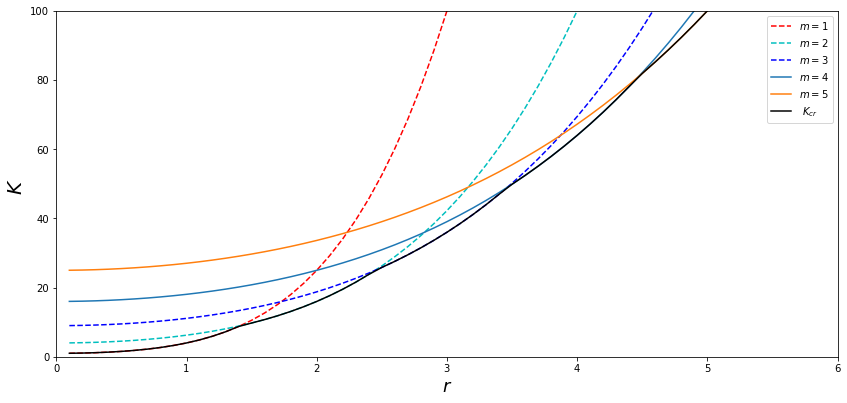

In [21]:
import matplotlib.pyplot as plt  
fig = plt.figure(figsize=(14,14/2.2))
ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(122)




ax1.plot(rval , Kmin_m1 , 'r--',label = r'$m=1$')
ax1.plot(rval , Kmin_m2 , 'c--',label = r'$m=2$')
ax1.plot(rval , Kmin_m3 , 'b--',label = r'$m=3$')
ax1.plot(rval , Kmin_m4  ,label = r'$m=4$')
ax1.plot(rval , Kmin_m5 , label = r'$m=5$')

ax1.set_xlabel(r'$r$', fontsize = 18)
ax1.set_ylabel(r'$K$  ' , fontsize = 20)

ax1.set_ylim(0,100)
ax1.set_xlim(0,6)


K_min = np.matrix([Kmin_m1,Kmin_m2,Kmin_m3,Kmin_m4,Kmin_m5])

Kmin = np.zeros(len(rval))
for j in range(0,len(rval)):
    Kmin[j] = np.min(K_min[:,j])
    
ax1.plot(rval,Kmin,'k', label = r' $K_{cr}$')


ax1.legend()




Note that values of $m$ we get from here for critical buckling load are same as we seen in 'SolidMechanics A Variational Approach' by Clive L. Dym • Irving H. Shames.  for buckling of thin plate under pure compressive load


Now, considering the case of
### Pure bending :
as explained before we take $\alpha=2$ and substitute in equations (10),(11),(12) and solve the resulting determinant equation equating it to $0$.

In [22]:
K = sym.symbols('K')
G1 = G.subs(No*a**2/(sym.pi**2*D),K).subs(alpha,2)
display(G1)

Matrix([
[(a**2/(b**2*m**2) + 1)**2,         -32*K/(9*pi**2*m**2),                            0],
[     -32*K/(9*pi**2*m**2), (16*a**2/(b**2*m**2) + 1)**2,        -96*K/(25*pi**2*m**2)],
[                        0,        -96*K/(25*pi**2*m**2), (81*a**2/(b**2*m**2) + 1)**2]])

Finding the determinant and equating it to zero we will obtain the following:

In [23]:
lhs3 = G1.det().simplify()
eqn3 = sym.Eq(lhs3,0)
display(eqn3)

Eq(-51849216*K**2*a**4/(625*pi**4*b**4*m**8) - 1298432*K**2*a**2/(625*pi**4*b**2*m**6) - 1386496*K**2/(50625*pi**4*m**4) + 1679616*a**12/(b**12*m**12) + 3610656*a**10/(b**10*m**10) + 2194465*a**8/(b**8*m**8) + 275620*a**6/(b**6*m**6) + 12390*a**4/(b**4*m**4) + 196*a**2/(b**2*m**2) + 1, 0)

In [24]:
sol3 = sym.solve(eqn3,K)
K=sol3[0].simplify()
display(Math(r'K = {}'.format(sym.latex(K))))

<IPython.core.display.Math object>

In [25]:
import numpy as np
r= sym.symbols('r')

Again defining K for this pure bending case and replacing the ratio $\frac{a}{b}$ by $r$ and proceeding as before

In [26]:
K = (225*np.sqrt(2)*(np.pi)**2*(r**2 + m**2)*(16*r**2 + m**2)*(81*r**2 + m**2))/((64*m**2)*(2050677*r**4 + 513545*r**2*m**2 + 677*m**4)**0.5)

K

(m**2 + 16*r**2)*(m**2 + 81*r**2)*(3140.4888898375*m**2 + 3140.4888898375*r**2)*(677*m**4 + 513545*m**2*r**2 + 2050677*r**4)**(-0.5)/(64*m**2)

Now we plot the variation of K with r for different values of $m$

In [27]:
def Kminn(r):
    mval = 1
    eqn_m1 =(mval**2+16*r**2)*(mval**2+81*r**2)*(3140.4888898375*(mval**2 + r**2))/((64*mval**2)*(677*mval**4 +513545*(mval*r)**2 + 2050677*r**4)**0.5)
    mval=2
    eqn_m2 = (mval**2+16*r**2)*(mval**2+81*r**2)*(3140.4888898375*(mval**2 + r**2))/((64*mval**2)*(677*mval**4 +513545*(mval*r)**2 + 2050677*r**4)**0.5)
    mval=3
    eqn_m3 = (mval**2+16*r**2)*(mval**2+81*r**2)*(3140.4888898375*(mval**2 + r**2))/((64*mval**2)*(677*mval**4 +513545*(mval*r)**2 + 2050677*r**4)**0.5)
    mval=4
    eqn_m4 = (mval**2+16*r**2)*(mval**2+81*r**2)*(3140.4888898375*(mval**2 + r**2))/((64*mval**2)*(677*mval**4 +513545*(mval*r)**2 + 2050677*r**4)**0.5)
    mval=5
    eqn_m5 = (mval**2+16*r**2)*(mval**2+81*r**2)*(3140.4888898375*(mval**2 + r**2))/((64*mval**2)*(677*mval**4 +513545*(mval*r)**2 + 2050677*r**4)**0.5)
    return  eqn_m1 ,eqn_m2,eqn_m3  ,  eqn_m4 , eqn_m5



In [28]:
r_val = np.arange(0.1,10,0.05)

Kmin_m1  , Kmin_m2 , Kmin_m3 , Kmin_m4 , Kmin_m5= Kminn(r_val)

# len(Kmin_m1)
# len(r_val)

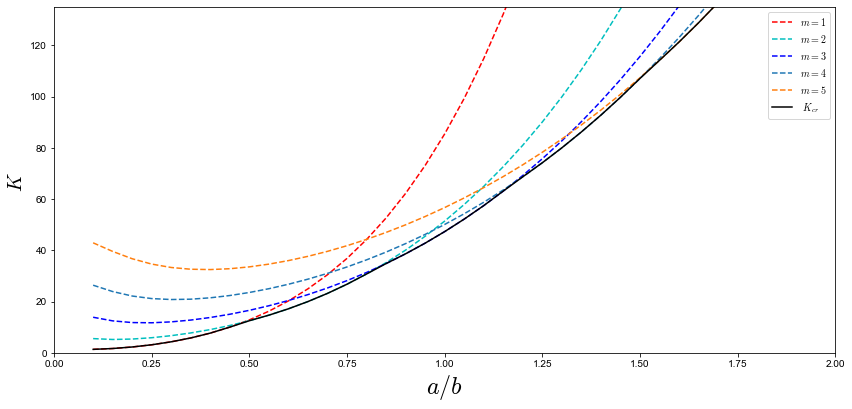

In [29]:
import matplotlib.pyplot as plt  
from matplotlib import rcParams


rcParams['font.family']='sans'
rcParams['font.sans-serif']='Arial'
rcParams['mathtext.fontset']='cm'

fig = plt.figure(figsize=(14,14/2.2))
ax1 = fig.add_subplot(111)





ax1.plot(r_val , Kmin_m1 , 'r--',label = r'$m=1$')
ax1.plot(r_val , Kmin_m2 , 'c--',label = r'$m=2$')
ax1.plot(r_val , Kmin_m3 , 'b--',label = r'$m=3$')
ax1.plot(r_val , Kmin_m4 , '--' , label = r'$m=4$')
ax1.plot(r_val , Kmin_m5 , '--' ,label = r'$m=5$')


ax1.set_xlabel(r'$a/b$', fontsize = 24)
ax1.set_ylabel(r'$K$  ' , fontsize = 20)

ax1.set_ylim(0,135)
ax1.set_xlim(0,2)


K_min = np.matrix([Kmin_m1,Kmin_m2,Kmin_m3,Kmin_m4,Kmin_m5])

Kmin = np.zeros(len(r_val))
for j in range(0,len(r_val)):
    Kmin[j] = np.min(K_min[:,j])
    
ax1.plot(r_val,Kmin,'k', label = r' $K_{cr}$')

ax1.legend()


Now we will plot displacement for certain values of $\frac{a}{b}$  , for the same pure bending(i.e. $\alpha = 2$ case) 

We will consider $\frac{a}{b}  = 0.25$ .From the above plot for that $\frac{a}{b}$ value we will get minimum critical buckling load for $m= 1$.

In [30]:
K_cr= K.subs([[m,1],[r,0.25]])
display(Math(r'K_{{cr}} = {}'.format(sym.latex(K_cr))))

<IPython.core.display.Math object>


 $$\left(\frac{a}{\pi}\right)^2\frac{(N_o)_{cr}}{D} =K_{cr}$$
 
that implies $${(N_o)_{cr}} = 3.13034D\left(\frac{\pi}{a}\right)^2$$

Taking the values of $a=1$ and $b =4$ so that $\frac{a}{b}=0.25$

In [31]:
G2 = G1.subs([[K,33.1302],[m,1],[a,1],[b,4]])
G2

Matrix([
[        289/256,  -32*K/(9*pi**2),                0],
[-32*K/(9*pi**2),                4, -96*K/(25*pi**2)],
[              0, -96*K/(25*pi**2),         9409/256]])

Now we will obtain the coefficients $a_{11},a_{12},a_{13}$ from the above matrix

In [32]:
a_11 ,a_12 ,a_13 = sym.symbols('a_11,a_12,a_13')
e1 = (289/256)*a_11 + (-32*K_cr/(9*(np.pi)**2))*a_12
e2 = (-32*K_cr/(9*(np.pi)**2))*a_11   +  4*a_12  +  (-96*K_cr/(25*(np.pi)**2))*a_13
e3 = (-96*K_cr/(25*(np.pi)**2))*a_12  +  (9409/256)*a_13


In [33]:
eqn1 = sym.Eq(e1,0)
eqn2 = sym.Eq(e2,0)
eqn3 = sym.Eq(e3,0)

display(eqn1 , eqn2 , eqn3)

Eq(1.12890625*a_11 - 1.12769247851052*a_12, 0)

Eq(-1.12769247851052*a_11 + 4*a_12 - 1.21790787679136*a_13, 0)

Eq(-1.21790787679136*a_12 + 36.75390625*a_13, 0)

The above equations are same as 3 homogenous equations (10),(11),(12) ,where we have substituted $K_{cr} , a, b$ values into them.

In [34]:
a_12val = (1.12890625/1.12769247851052)*a_11
eqn3.subs(a_12,a_12val)


Eq(-1.21921875*a_11 + 36.75390625*a_13, 0)

In [35]:
a_13val = (1.21921875/36.75390625)*a_11

display(a_12val,a_13val)

1.00107633198998*a_11

0.0331724944202359*a_11

In [36]:
A1n = sym.symbols('a_1n')
w1n = A1n*sym.sin(m*sym.pi*x/a)*sym.sin(n*sym.pi*y/b)
display(Math(r'w = \sum\limits_{{n=1}} ^{{3}} {}'.format(sym.latex(w1n))))

<IPython.core.display.Math object>

In [37]:
w1 = w1n.subs(([[m,1],[a,1],[b,4]]))
display(Math(r'w = \sum\limits_{{n=1}} ^{{3}} {}'.format(sym.latex(w1))))

<IPython.core.display.Math object>

Solution for w will be $$w = a_{11}sin(\frac{\pi x}{1})\left( sin(\frac{\pi y}{4})+1.00107633198998 sin(\frac{2\pi y}{4})+0.0331724944202359 sin(\frac{3\pi y}{4})\right)$$ 


The displacement plots are obtained as follows

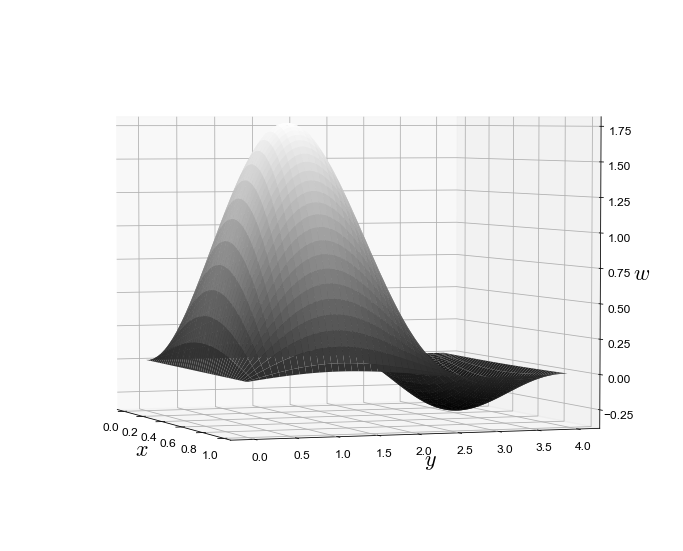

In [38]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

from matplotlib import rcParams

import numpy as np
pi = np.pi

pi = np.pi
rcParams['font.family']='sans'
rcParams['font.sans-serif']='Arial'
rcParams['font.size']=12
rcParams['mathtext.fontset']='cm'



xval = np.arange(0,1,0.01)
yval = np.arange(0,4,0.01)

X, Y = np.meshgrid(xval,yval)

w_val = (np.sin((pi)*X/1))*((np.sin((pi)*Y/4)) + (  1.00107633198998*(np.sin(2*pi*Y/4))  ) + (  0.0331724944202359*(np.sin(3*pi*Y/4))  ))

fig = plt.figure(figsize=(12,16/1.62))
ax = fig.add_subplot(111,projection='3d')

ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_zlabel(r'$w$',fontsize=22)

surf = ax.plot_surface(X,Y,w_val,cmap = plt.cm.gray)
ax.view_init(3,-20)




Now we will consider the case $\frac{a}{b} = 1$. .From the above plot for that $\frac{a}{b}$ value we will get minimum critical buckling load for $m= 3$.

In [39]:
K_cr2 = K.subs([[m,3],[r,1]])
display(Math(r'K_{{cr2}} = {}'.format(sym.latex(K_cr2))))

<IPython.core.display.Math object>



 $$\left(\frac{a}{\pi}\right)^2\frac{(N_o)_{cr}}{D} =K_{cr2}$$
that implies $${(N_o)_{cr}} =47.2969414677309D\left(\frac{\pi}{a}\right)^2$$

In [40]:
G2_2 = G1.subs([[K,47.2969414677309],[m,3],[a,1],[b,1]])
G2_2

Matrix([
[          100/81, -32*K/(81*pi**2),                0],
[-32*K/(81*pi**2),           625/81, -32*K/(75*pi**2)],
[               0, -32*K/(75*pi**2),              100]])

Now we will obtain the coefficients $a_{31},a_{32},a_{33}$ from the above matrix

In [41]:
a_31 ,a_32 ,a_33 = sym.symbols('a_31,a_32,a_33')


e1_3 = (100/81)*a_31 + ((-32*K_cr2)/(81*(np.pi)**2))*a_32 
e2_3 =   ((-32*K_cr2)/(81*(np.pi)**2))*a_31  + (625/81) *a_32  + ((-32*K_cr2)/(75*(np.pi)**2))*a_33      
e3_3= ((-32*K_cr2)/(81*(np.pi)**2))*a_32 + 100*a_33


In [42]:
eqn4 = sym.Eq(e1_3,0)
eqn5 = sym.Eq(e2_3,0)
eqn6 = sym.Eq(e3_3,0)

display(eqn4 , eqn5 , eqn6)

Eq(1.23456790123457*a_31 - 1.89320774011767*a_32, 0)

Eq(-1.89320774011767*a_31 + 7.71604938271605*a_32 - 2.04466435932709*a_33, 0)

Eq(-1.89320774011767*a_32 + 100*a_33, 0)

The above equations are same as 3 homogenous equations (10),(11),(12) ,where we have substituted $K_{cr} , a, b$ values into them.

In [43]:
a_32val = (1.23456790123457/1.89320774011767)*a_31
display(eqn5.subs(a_32,a_32val))


Eq(3.1384571376363*a_31 - 2.04466435932709*a_33, 0)

In [44]:
a_33val = (3.1384571376363/2.04466435932709)*a_31

display(a_31,a_32val ,a_33val)

a_31

0.652103768156915*a_31

1.53494979423869*a_31

In [45]:
A_3n = sym.symbols('a_3n')
w3n = A_3n*sym.sin(m*sym.pi*x/a)*sym.sin(n*sym.pi*y/b)
display(Math(r'w = \sum\limits_{{n=1}} ^{{3}} {}'.format(sym.latex(w3n))))

<IPython.core.display.Math object>

In [46]:
w2 = w3n.subs(([[m,3],[a,1],[b,1]]))
display(Math(r'w = \sum\limits_{{n=1}} ^{{3}} {}'.format(sym.latex(w2))))

<IPython.core.display.Math object>

The solution for w will be $$w = a_{31}sin(3\pi x)\left( sin(\pi y)+0.652103768156915 sin(2\pi y)+1.53494979423869sin(3\pi y)\right)$$ 
 

The displacement plots are obtained as follows:

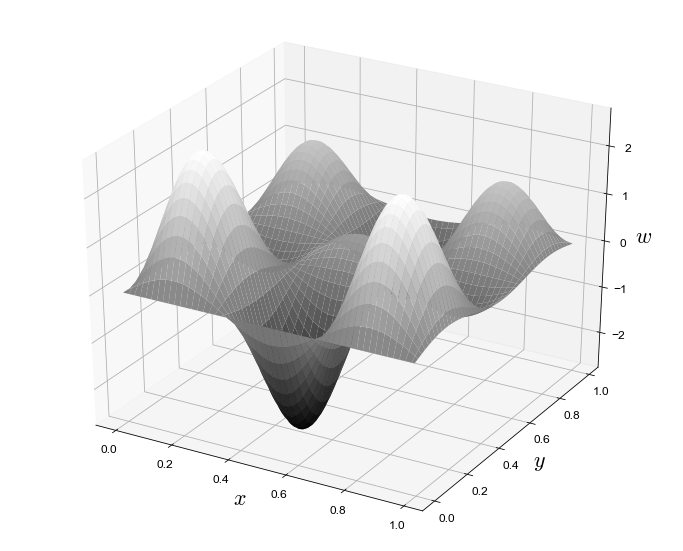

In [47]:
rcParams['font.family']='sans'
rcParams['font.sans-serif']='Arial'
rcParams['font.size']=12
rcParams['mathtext.fontset']='cm'






xval = np.arange(0,1,0.01)
yval = np.arange(0,1,0.01)

X, Y = np.meshgrid(xval,yval)

w2_sol = (np.sin(3*pi*X))*((1*np.sin(Y*1*pi)) +   0.652103768156915*np.sin(Y*(pi*2)) + 1.53494979423869*np.sin(Y*3*pi) )

fig = plt.figure(figsize=(12,16/1.62))
ax = fig.add_subplot(111,projection='3d')

ax.set_xlabel(r'$x$',fontsize=22)
ax.set_ylabel(r'$y$',fontsize=22)
ax.set_zlabel(r'$w$',fontsize=22)

surf = ax.plot_surface(X,Y,w2_sol,cmap = plt.cm.gray)
#ax.view_init(4,200)



# References
- Timoshenko, Stephen P._ Gere, James M. - Theory of Elastic Stability
- Clive L. Dym, Irving H. Shames (auth.) - Solid Mechanics_ A Variational Approach

# Contributions
Overall this project has been done collectively as a group, individual contributions are as follows
- Neeraj Narayanan (20ME63R23): Implementing problem in sympy problem formulation,  <br>
- Vikram Kumar     (20ME63R29): formulated basics of the problem and Plotting of results, maintaining Github repository<br>
- Nikhil Anand     (20ME63R39): Implementation of problem and deriving results in sympy